In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Data
MAIN = "C:\\Users\\Brown Planning\\Documents\\Innova\\"
REPO = "data_science_poc\\PersonnelDeviation\\GIMME\\"
file = "AdjR_Sq10CoefTbl.csv"
fpath = MAIN + REPO + file
df = pd.read_csv(fpath)
variables = df['feature']
base = 0
lows = df['[0.025']
values = df['coef']
highs = df['0.975]']
df

,Unnamed: 0,feature,coef,std err,t,P>|t|,[0.025,0.975]
0,0,1110,-18.6173,12.657,-1.471,0.143,-43.577,6.343
1,1,1110*Mid-Grade Officer,-61.3526,25.489,-2.407,0.017,-111.617,-11.089
2,2,1160,84.4552,14.795,5.708,0.000,55.279,113.631
3,3,1160*Journeyman,-196.0957,25.105,-7.811,0.000,-245.603,-146.589
4,4,811A,-11.1623,15.235,-0.733,0.465,-41.206,18.881
5,5,811A*Warrant,25.4857,25.878,0.985,0.326,-25.547,76.518
6,6,FRP Phase_D,8.4307,4.327,1.948,0.053,-0.102,16.963
7,7,GSCS,-10.4750,4.381,-2.391,0.018,-19.115,-1.835
8,8,GSCS*Mid-Grade Officer,47.9100,26.852,1.784,0.076,-5.042,100.862
9,9,Journeyman,152.2922,16.755,9.089,0.000,119.250,185.334


(-1.0, 10.0)

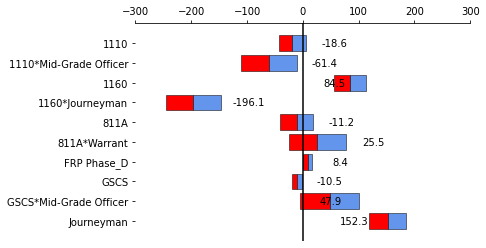

In [69]:
# The actual drawing part
# The y position for each variable
ys = range(len(highs))[::-1]  # top to bottom

# Plot the bars, one by one
for y, low, high, val in zip(ys, lows, highs, values):
    # The width of the 'low' and 'high' pieces
    low_width = -abs(low - val)
    high_width = abs(high - val)
    # Each bar is a "broken" horizontal bar chart
    plt.broken_barh(
        [(val, low_width), (val, high_width)],
        (y - 0.4, 0.8),
        facecolors=['red', 'cornflowerblue'],  # Try different colors if you like
        edgecolors=['black', 'black'],
        linewidth=0.5,
    )
    # Display the value as text. It should be positioned in the center of
    # the 'high' bar, except if there isn't any room there, then it should be
    # next to bar instead.
    x = base + high / 2
    if x <= base + 50:
        x = base + high + 50
    plt.text(x, y, f'{val:.1f}', va='center', ha='center')

# Draw a vertical line down the middle
plt.axvline(base, color='black')

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables)

# Set the portion of the x- and y-axes to show
plt.xlim(base - 300, base + 300)
plt.ylim(-1, len(variables))